# Error Analysis of Euler Scheme (HOMEWORK) 

## León-Alexander Hühn, Alexandra Beikert, Pascal Huber

### a) Euler Scheme

In [12]:
# Import the essentials
import numpy as np
import matplotlib.pyplot as plt

# Implement the two-body integration
# Two coordinates are sufficient, as the trajectories lie in a plane
def tb_integrator(w_in, s_in, step_size, steps):
    # Dimensionless quantities are used for best internal representation
    # Start with the initial values
    w_x = [w_in[0]]
    w_y = [w_in[1]]
    s_x = [s_in[0]]
    s_y = [s_in[1]]
    # Append new values generated by Euler integration
    for i in range(0,steps,1):
        w_x.append(w_x[i] - step_size * (s_x[i] / np.sqrt(s_x[i]**2 + s_y[i]**2)**3))
        w_y.append(w_y[i] - step_size * (s_y[i] / np.sqrt(s_x[i]**2 + s_y[i]**2)**3))
        s_x.append(s_x[i] + step_size * w_x[i])
        s_y.append(s_y[i] + step_size * w_y[i])
    # Return generated values
    return w_x, w_y, s_x, s_y

# Implement calculation of the eccentricity (using initial values)
def calc_e(w_in, s_in):
    # Use numpy arrays, which can be used with numpy vector functions
    w_in = np.array(w_in)
    s_in = np.array(s_in)
    # Calculate Laplace-Runge-Lenz-Vector
    e_vec = s_in * np.linalg.norm(w_in) - w_in * np.dot(w_in, s_in) - s_in
    # The norm of e_vec is the eccentricity
    return np.linalg.norm(e_vec)

# Implement calculator for the relative error of energy, given a set of data
def energy_error(w_x, w_y, s_x, s_y):
    # Calculate initial energy
    E_0 = w_x[0]**2 + w_y[0]**2 - 1/np.sqrt(s_x[0]**2 + s_y[0]**2)
    # Calculate final energy
    E_f = w_x[-1]**2 + w_y[-1]**2 - 1/np.sqrt(s_x[-1]**2 + s_y[-1]**2)
    # Return result
    return np.abs(E_f-E_0)/E_0

In [37]:
# Generate 3 different eccentricities
w_in_1 = (.86,0)
w_in_2 = (.6,-np.sqrt(1/2))
w_in_3 = (1,0)

# Choose initial position
s_in = (0,2)

# Print corresponding eccentricities
print("1. Eccentricity:", calc_e(w_in_1, s_in))
print("2. Eccentricity:", calc_e(w_in_2, s_in))
print("3. Eccentricity:", calc_e(w_in_3, s_in))

# Choose 5 different stepsizes
h1 = .001
h2 = .01
h3 = .1
h4 = 1
h5 = 10

1. Eccentricity: 0.28
2. Eccentricity: 1.4253623417942385
3. Eccentricity: 0.0


Now, we can integrate one orbit of the two body problem for each eccentricity and for each step size.  
Each log-log plot of the error will contain one eccentricity with the different step sizes.  
The length of the orbits has been determined numerically

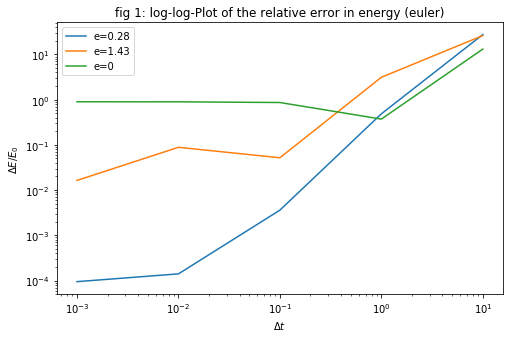

In [39]:
# Integrate orbits
w_x_s1, w_y_s1, s_x_s1, s_y_s1 = tb_integrator(w_in_1, s_in, h1, 47380)
w_x_s2, w_y_s2, s_x_s2, s_y_s2 = tb_integrator(w_in_1, s_in, h2, 4857)
w_x_s3, w_y_s3, s_x_s3, s_y_s3 = tb_integrator(w_in_1, s_in, h3, 623)
w_x_s4, w_y_s4, s_x_s4, s_y_s4 = tb_integrator(w_in_1, s_in, h4, 50)
w_x_s5, w_y_s5, s_x_s5, s_y_s5 = tb_integrator(w_in_1, s_in, h5, 5)

# Calculate error in energy
error = [energy_error(w_x_s1, w_y_s1, s_x_s1, s_y_s1),energy_error(w_x_s2, w_y_s2, s_x_s2, s_y_s2),
        energy_error(w_x_s3, w_y_s3, s_x_s3, s_y_s3),energy_error(w_x_s4, w_y_s4, s_x_s4, s_y_s4),
        energy_error(w_x_s5, w_y_s5, s_x_s5, s_y_s5)]
# Plot results
plt.figure(figsize=(8,5))
plt.title("fig 1: log-log-Plot of the relative error in energy (euler)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta t$')
plt.ylabel('$\Delta E / E_0$')

plt.plot([h1,h2,h3,h4,h5], error, label="e=0.28")

# Do the same steps again with the other 2 eccentricities
w_x_s1, w_y_s1, s_x_s1, s_y_s1 = tb_integrator(w_in_2, s_in, h1, 129558)
w_x_s2, w_y_s2, s_x_s2, s_y_s2 = tb_integrator(w_in_2, s_in, h2, 31780)
w_x_s3, w_y_s3, s_x_s3, s_y_s3 = tb_integrator(w_in_2, s_in, h3, 654)
w_x_s4, w_y_s4, s_x_s4, s_y_s4 = tb_integrator(w_in_2, s_in, h4, 50)
w_x_s5, w_y_s5, s_x_s5, s_y_s5 = tb_integrator(w_in_2, s_in, h5, 10)

error = [energy_error(w_x_s1, w_y_s1, s_x_s1, s_y_s1),energy_error(w_x_s2, w_y_s2, s_x_s2, s_y_s2),
        energy_error(w_x_s3, w_y_s3, s_x_s3, s_y_s3),energy_error(w_x_s4, w_y_s4, s_x_s4, s_y_s4),
        energy_error(w_x_s5, w_y_s5, s_x_s5, s_y_s5)]

plt.plot([h1,h2,h3,h4,h5], error, label="e=1.43")

w_x_s1, w_y_s1, s_x_s1, s_y_s1 = tb_integrator(w_in_3, s_in, h1, 47380)
w_x_s2, w_y_s2, s_x_s2, s_y_s2 = tb_integrator(w_in_3, s_in, h2, 4857)
w_x_s3, w_y_s3, s_x_s3, s_y_s3 = tb_integrator(w_in_3, s_in, h3, 623)
w_x_s4, w_y_s4, s_x_s4, s_y_s4 = tb_integrator(w_in_3, s_in, h4, 50)
w_x_s5, w_y_s5, s_x_s5, s_y_s5 = tb_integrator(w_in_3, s_in, h5, 5)

error = [energy_error(w_x_s1, w_y_s1, s_x_s1, s_y_s1),energy_error(w_x_s2, w_y_s2, s_x_s2, s_y_s2),
        energy_error(w_x_s3, w_y_s3, s_x_s3, s_y_s3),energy_error(w_x_s4, w_y_s4, s_x_s4, s_y_s4),
        energy_error(w_x_s5, w_y_s5, s_x_s5, s_y_s5)]

plt.plot([h1,h2,h3,h4,h5], error, label="e=0")

plt.legend()
plt.show()

*Discussion of the result*

One can see that the general expectation of the error being linearily dependant on the step-size is met. Without the required log-log plot, one could actually see a pretty straight line. However, there are small "bumps" that show that the error is acutally getting smaller for a higher step-size, which is not expected. It might be due to the step-sizes not alway accurately resulting in exactly one orbit.  
Even though the error looks neglectable for e=0.28 and e=1.43 for low enough step sizes, it is actually very relevant for e=0, because the resulting orbit will no longer be a circle. If one were to integrate multiple orbits, a spiral form could be seen. This shows that pure Euler integration is not sufficient for this case and a higher order scheme should be used.

### b) the same with leapfrog

In [10]:
#Implementation of the leap-frog kick-drift-kick method
def leapfrog(w_in, s_in, step_size, steps):
    w_x = [w_in[0]]
    w_y = [w_in[1]]
    s_x = [s_in[0]]
    s_y = [s_in[1]]
    for i in range(0,steps,1):
        #overwrite for half-step velocity
        w_x[i] = w_x[i] - step_size/2 * (s_x[i] / np.sqrt(s_x[i]**2 + s_y[i]**2)**3)
        w_y[i] = w_y[i] - step_size/2 * (s_y[i] / np.sqrt(s_x[i]**2 + s_y[i]**2)**3)
        
        s_x.append(s_x[i] + step_size * w_x[i])
        s_y.append(s_y[i] + step_size * w_y[i])
        
        w_x.append(w_x[i] - step_size/2 * (s_x[i+1] / np.sqrt(s_x[i+1]**2 + s_y[i+1]**2)**3))
        w_y.append(w_y[i] - step_size/2 * (s_y[i+1] / np.sqrt(s_x[i+1]**2 + s_y[i+1]**2)**3))
        
        w_x[i+1] = w_x[i+1] - step_size/2 * (s_x[i+1] / np.sqrt(s_x[i+1]**2 + s_y[i+1]**2)**3)
        w_y[i+1] = w_y[i+1] - step_size/2 * (s_y[i+1] / np.sqrt(s_x[i+1]**2 + s_y[i+1]**2)**3)
        
    # Return generated values
    return w_x, w_y, s_x, s_y

Now we do exactly the same as above, but using the leap-frog method. The eccentricities and the starting values remain the same.

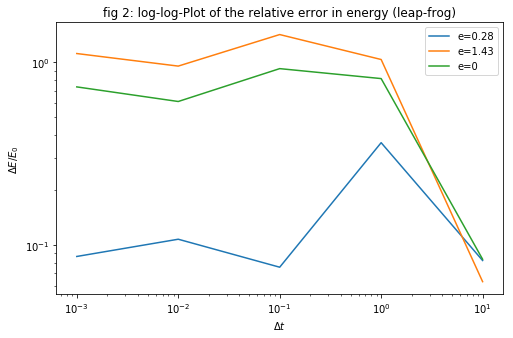

In [40]:
# Integrate orbits
w_x_s1, w_y_s1, s_x_s1, s_y_s1 = leapfrog(w_in_1, s_in, h1, 47380)
w_x_s2, w_y_s2, s_x_s2, s_y_s2 = leapfrog(w_in_1, s_in, h2, 4857)
w_x_s3, w_y_s3, s_x_s3, s_y_s3 = leapfrog(w_in_1, s_in, h3, 623)
w_x_s4, w_y_s4, s_x_s4, s_y_s4 = leapfrog(w_in_1, s_in, h4, 50)
w_x_s5, w_y_s5, s_x_s5, s_y_s5 = leapfrog(w_in_1, s_in, h5, 5)

# Calculate error in energy
error = [energy_error(w_x_s1, w_y_s1, s_x_s1, s_y_s1),energy_error(w_x_s2, w_y_s2, s_x_s2, s_y_s2),
        energy_error(w_x_s3, w_y_s3, s_x_s3, s_y_s3),energy_error(w_x_s4, w_y_s4, s_x_s4, s_y_s4),
        energy_error(w_x_s5, w_y_s5, s_x_s5, s_y_s5)]
# Plot results
plt.figure(figsize=(8,5))
plt.title("fig 2: log-log-Plot of the relative error in energy (leap-frog)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta t$')
plt.ylabel('$\Delta E / E_0$')

plt.plot([h1,h2,h3,h4,h5], error, label="e=0.28")

# Do the same steps again with the other 2 eccentricities
w_x_s1, w_y_s1, s_x_s1, s_y_s1 = leapfrog(w_in_2, s_in, h1, 129558)
w_x_s2, w_y_s2, s_x_s2, s_y_s2 = leapfrog(w_in_2, s_in, h2, 31780)
w_x_s3, w_y_s3, s_x_s3, s_y_s3 = leapfrog(w_in_2, s_in, h3, 654)
w_x_s4, w_y_s4, s_x_s4, s_y_s4 = leapfrog(w_in_2, s_in, h4, 50)
w_x_s5, w_y_s5, s_x_s5, s_y_s5 = leapfrog(w_in_2, s_in, h5, 10)

error = [energy_error(w_x_s1, w_y_s1, s_x_s1, s_y_s1),energy_error(w_x_s2, w_y_s2, s_x_s2, s_y_s2),
        energy_error(w_x_s3, w_y_s3, s_x_s3, s_y_s3),energy_error(w_x_s4, w_y_s4, s_x_s4, s_y_s4),
        energy_error(w_x_s5, w_y_s5, s_x_s5, s_y_s5)]

plt.plot([h1,h2,h3,h4,h5], error, label="e=1.43")


w_x_s1, w_y_s1, s_x_s1, s_y_s1 = leapfrog(w_in_3, s_in, h1, 47380)
w_x_s2, w_y_s2, s_x_s2, s_y_s2 = leapfrog(w_in_3, s_in, h2, 4857)
w_x_s3, w_y_s3, s_x_s3, s_y_s3 = leapfrog(w_in_3, s_in, h3, 623)
w_x_s4, w_y_s4, s_x_s4, s_y_s4 = leapfrog(w_in_3, s_in, h4, 50)
w_x_s5, w_y_s5, s_x_s5, s_y_s5 = leapfrog(w_in_3, s_in, h5, 5)

error = [energy_error(w_x_s1, w_y_s1, s_x_s1, s_y_s1),energy_error(w_x_s2, w_y_s2, s_x_s2, s_y_s2),
        energy_error(w_x_s3, w_y_s3, s_x_s3, s_y_s3),energy_error(w_x_s4, w_y_s4, s_x_s4, s_y_s4),
        energy_error(w_x_s5, w_y_s5, s_x_s5, s_y_s5)]

plt.plot([h1,h2,h3,h4,h5], error, label="e=0")

plt.legend()
plt.show()

*Discussion of the result*

Now the error remains relatively constant with small step sizes and decreases linearly with larger step sizes.
In contrast to the Euler method, the method becomes better with increasing stepsize.
As expected, the leapfrog scheme gives better results than the Euler scheme, as it is a second-order method and thus less neglected.